In [7]:
from collections import defaultdict
import csv 
from csv import reader
from scipy.optimize import linear_sum_assignment
#from PIL import Image as im
from IPython.core.display import Image, display
import requests
from io import BytesIO
import json 

'''
Ambiguity
    Multiple Options > A/M
    Definition, Location > A/L
    Definition, Destination/Intention > A/D
    Definition, Kind/Type > A/K
    Definition, Time > A/T
    Gouping > A/G

Uncertainty > U

Mistakes/Bad Data
    Annotator mistakes > M/A
    Bad question/bad images > M/B

Misc/need reclassifying > ~

Question with multiple classification will have '.' between the classificiations
ex: A/M.A/L.M/B)
'''

input_csv = "csv_input-Batch_1886_results.csv"
data = []
with open(input_csv) as read_obj:
    csv_reader = csv.DictReader(read_obj)
    for row in csv_reader:
        data.append(row)


In [ ]:
'''
Display by classification
'''
search_item = 'A/L'

for row in data:
    temp = row['Answer.skip_reason'].strip('"')
    labels = temp.split('.')
    
    if search_item in labels:
        groups = []

        new_questions = json.loads(row['Answer.answer_questions'])
        for i, g in enumerate(json.loads(row['Answer.answer_groups'])):
            group = []
            new_question = new_questions[i]
            for x in g:
                group.append(x['content'])
            groups.append({new_question: group})
        print(row['Input.questionStr'])
        print(row['Input.imgUrl'])
        print(groups)
        print(labels)

        image_url = row['Input.imgUrl'].strip('"')
        display(Image(url=image_url))
       

In [33]:
'''
Display by number of classifications
'''
search_num = 3

for row in data:
    temp = row['Answer.skip_reason'].strip('"')
    labels = temp.split('.')
    
    if len(labels) >= search_num:
        groups = []

        new_questions = json.loads(row['Answer.answer_questions'])
        for i, g in enumerate(json.loads(row['Answer.answer_groups'])):
            group = []
            new_question = new_questions[i]
            for x in g:
                group.append(x['content'])
            groups.append({new_question: group})
        print(row['Input.questionStr'])
        print(row['Input.imgUrl'])
        print(groups)
        print(labels)

        image_url = row['Input.imgUrl'].strip('"')
        display(Image(url=image_url))

"What bridge can be seen in the distance?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000426038.jpg"
[{'What bridge name can be seen in the distance?': ['brooklyn bridge']}, {"What city's bridge can be seen in the distance?": ['london']}, {'What type of bridge can be seen in the distance?': ['suspension']}]
['U', 'M/A', 'A/K']


"Where is the white wine bottle?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000472432.jpg"
[{'Where is the white wine bottle in photo?': ['not visible']}, {'Where is the white wine bottle fill line?': ['empty']}]
['U', 'M/A', 'M/B']


"What is the writing?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000035884.jpg"
[{'What is the writing possibly?': ['note']}, {'What is using for the writing?': ['phone']}]
['U', 'M/B', 'M/A']


"What game is he playing?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000476738.jpg"
[{'What game name is he playing?': ['slot machines']}, {'What game is he playing with?': ['laptop']}]
['U', 'M/B', 'M/A']


"What is the brand name of the backpack?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000237872.jpg"
[{'What is the possible brand name of the backpack?': ['adidas']}, {'What is the brand name of the backpack visible?': ["don't know"]}, {'What is the brand name of the backpack used for?': ['sportswear']}]
['U', 'M/B', 'M/A']


"What kind of food is this?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000351654.jpg"
[{'What kind of food product is this?': ['quiche']}, {'What kind of food ingredients is this?': ['cake, bread, vegetables, meat']}]
['A/M', 'A/K', 'A/G']


"What are the people doing?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000144552.jpg"
[{'What are the people doing in motion': ['moving']}, {'What activity are the people doing?': ['biking']}, {'What are the people doing here?': ['enjoying park']}, {'What activity are the people doing?': ['biking, running, walking']}]
['A/M', 'A/G', '~']


"What is the laptop's screen facing?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000363464.jpg"
[{"What is the laptop's screen facing nearby?": ['another laptop']}, {"Who is the laptop's screen facing?": ['person']}, {"What part of the laptop's screen facing?": ['front']}, {"What position is the laptop's screen?": ['open']}, {"In what is the laptop's screen facing located?": ['room']}]
['A/M', 'A/L', 'U']


"What type of food is pictured?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000185236.jpg"
[{'What  is the name of food ipictured?': ['broccoli, pasta, chicken nuggets, rice']}, {'What ethnic type of food is pictured?': ['oriental']}, {'What meal type of food is pictured?': ['dinner']}]
['A/M', 'A/K', 'A/G']


"What is the name of the hotel?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000276694.jpg"
[{'What is the name of the hotel for cost called?': ['budget hotel']}, {'What is the name of the hotel possibly?': ['marriott']}]
['U', 'M/B', 'M/A']


"What food is shown?"
"https://cs.jhu.edu/~esteng/images_for_hit/COCO_train2014_000000432153.jpg"
[{'What food is shown on the plate?': ['meat potatoes broccoli']}, {'What food meal is shown?': ['dinner']}]
['A/M', 'A/T', 'A/G', '~']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

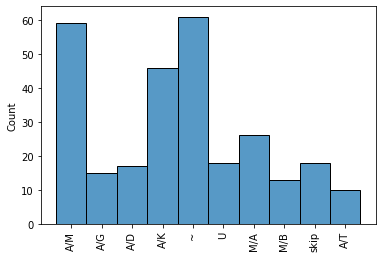

In [32]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 

num_mistakes_other = 0
num_to_keep = 0
total = 0
# histogram 
acceptable = ['A/M', 'A/G', 'A/D', 'A/K', 'A/T', 'U', 'M/A', 'M/B', 'skip', '~']
to_keep = ['A/M', 'A/G', 'A/D', 'A/K', 'A/T',  '~']
all_labels = []
for row in data:
    temp = row['Answer.skip_reason'].strip('"')
    labels = temp.split('.')
    for lab in labels:
        if lab in acceptable:
            all_labels.append(lab)
    total += 1
    for lab in labels:
        if lab in to_keep: 
            num_to_keep += 1 
            break
        else:
            num_mistakes_other  += 1
            break



g = sns.histplot(all_labels)

plt.xticks(rotation=90)


print(f"There are {total} examples, with {num_to_keep} good ones and {num_mistakes_other} bad ones.")